<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-загрузка-данных" data-toc-modified-id="Обзор-и-загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследование" data-toc-modified-id="Исследование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></div>

## Обзор и загрузка данных

Загрузка библиотек

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2') 


In [2]:
def table_info (df):
    display(df.sample(10)) #10 случайных строк
    print('---------------')
    df.info() #инфо по столбцам
    print('---------------')
    print('Дубликатов:', df.duplicated().sum()) #кол-во дубликатов
    print('---------------')
    print('Пропущенных значений', df.isna().sum()) #кол-во пропущенных значений

In [3]:
df = pd.read_csv('digital_analytics.csv')

In [4]:
table_info(df)

,Кампания,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу
213,yd_ros_dsa_pg_search,"43584,33","74,00","889,48","0,00","1,04","0,00","1,40%"
295,yd_ekb_korpus_shkaf-all-types_network-v2,"31658,72","26,45","1021,25","0,00","0,00","0,00","0,00%"
381,yd_ufa_couches_all-types_general_network,"22226,53","44,45","673,53","0,00","0,00","0,00","0,00%"
129,yd_tamb_smart_banner_retargeting_new_lal_roi,"62890,03","49,33","616,57","31445,02","60,10","74880,00","121,84%"
360,yd_kal_couches_all-types_network_v4_new_ctr,"23998,18","15,86","1846,01","0,00","0,41","0,00","2,59%"
201,yd_smol_smart_banner_retargeting_new,"45404,82","40,22","463,31","45404,82","19,48","21990,00","48,43%"
118,yd_chel_smart_banner_retargeting_new_lal_roi,"67410,13","30,56","255,34","13482,03","57,74","125380,00","188,94%"
211,yd_barn_couches_kreslo_all-types_search,"43953,62","34,31","697,68","0,00","1,34","0,00","3,91%"
119,yd_spb_mebel_likvid_network_cpa,"66704,00","47,41","264,70","9529,14","215,66","302590,00","454,91%"
208,yd_kazan_couches_all-types_network_v4_new,"44240,33","24,04","1382,51","44240,33","6,60","12030,00","27,44%"


---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Кампания                             500 non-null    object
 1   Стоимость                            501 non-null    object
 2   Цена за клик                         501 non-null    object
 3   Цена за конверсию                    501 non-null    object
 4   Цена за транзакцию                   501 non-null    object
 5   Доход от клика                       501 non-null    object
 6   Доход                                501 non-null    object
 7   Рентабельность инвестиций в рекламу  501 non-null    object
dtypes: object(8)
memory usage: 31.4+ KB
---------------
Дубликатов: 0
---------------
Пропущенных значений Кампания                               1
Стоимость                              0
Цена за клик                           0

## Предобработка данных

Убираем знак '%' в значениях в столбце `Рентабельность инвестиций в рекламу`.

In [5]:
df['Рентабельность инвестиций в рекламу'] = (
    df['Рентабельность инвестиций в рекламу'].str.strip('%')
)
df.head()

,Кампания,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу
0,yd_msk_brand_search-v2,"3041597,51","71,48","165,51","5570,69","473,17","19881597,00","662,00"
1,yd_msk_dsa_pg_search,"1689478,74","74,74","830,21","25991,98","113,49","2536950,00","151,85"
2,yd_msk_magazin-mebeli_asmaster,"1066203,80","98,04","358,99","15913,49","220,69","2374281,00","225,10"
3,yd_spb_smart_banner_retargeting_new_lal_roi,"1059525,28","60,89","365,35","24080,12","85,15","1455046,00","139,84"
4,yd_spb_brand_search-v2,"1044593,43","64,05","134,72","4002,27","520,98","8415962,00","813,39"


Заменим запятую на точку в данных с цифрами. 

In [6]:
for i in df[['Стоимость','Цена за клик','Цена за конверсию','Цена за транзакцию',
           'Доход от клика', 'Доход', 'Рентабельность инвестиций в рекламу']]:
    df[i] = df[i].apply(lambda x: x.replace(',','.'))
df.head()

,Кампания,Стоимость,Цена за клик,Цена за конверсию,Цена за транзакцию,Доход от клика,Доход,Рентабельность инвестиций в рекламу
0,yd_msk_brand_search-v2,3041597.51,71.48,165.51,5570.69,473.17,19881597.00,662.00
1,yd_msk_dsa_pg_search,1689478.74,74.74,830.21,25991.98,113.49,2536950.00,151.85
2,yd_msk_magazin-mebeli_asmaster,1066203.80,98.04,358.99,15913.49,220.69,2374281.00,225.10
3,yd_spb_smart_banner_retargeting_new_lal_roi,1059525.28,60.89,365.35,24080.12,85.15,1455046.00,139.84
4,yd_spb_brand_search-v2,1044593.43,64.05,134.72,4002.27,520.98,8415962.00,813.39


Изменим тип значений в столбцах.

In [7]:
df = df.astype({'Стоимость': np.float64, 'Цена за клик': np.float64, 
                'Цена за конверсию': np.float64, 'Цена за транзакцию': np.float64,
               'Доход от клика': np.float64, 'Доход': np.float64,
               'Рентабельность инвестиций в рекламу': np.float64})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Кампания                             500 non-null    object 
 1   Стоимость                            501 non-null    float64
 2   Цена за клик                         501 non-null    float64
 3   Цена за конверсию                    501 non-null    float64
 4   Цена за транзакцию                   501 non-null    float64
 5   Доход от клика                       501 non-null    float64
 6   Доход                                501 non-null    float64
 7   Рентабельность инвестиций в рекламу  501 non-null    float64
dtypes: float64(7), object(1)
memory usage: 31.4+ KB


Изменим названия столбцов.

In [8]:
df = df.rename(columns={'Кампания': 'advertisement',
                       'Стоимость': 'budget',
                       'Цена за клик' : 'price_per_click',
                       'Цена за конверсию' : 'price_per_conv',
                       'Цена за транзакцию' : 'price_per_transac', 
                       'Доход от клика' : 'income_from_click',
                       'Доход' : 'revenue',
                       'Рентабельность инвестиций в рекламу' : 'profitability_investment'})
df.columns

Index(['advertisement', 'budget', 'price_per_click', 'price_per_conv',
       'price_per_transac', 'income_from_click', 'revenue',
       'profitability_investment'],
      dtype='object')

Удалим строчку с пропуском названия компании.

In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   advertisement             500 non-null    object 
 1   budget                    500 non-null    float64
 2   price_per_click           500 non-null    float64
 3   price_per_conv            500 non-null    float64
 4   price_per_transac         500 non-null    float64
 5   income_from_click         500 non-null    float64
 6   revenue                   500 non-null    float64
 7   profitability_investment  500 non-null    float64
dtypes: float64(7), object(1)
memory usage: 35.2+ KB


## Исследование

Распределение данных по рентабельности. Можно увидеть, что наибольшее количество значений находится до отметки в 250. 50% значений лежит в промежутке от 0 до 5%.

count     500.00000
mean      110.22348
std       217.61789
min         0.00000
25%         0.00000
50%         5.87500
75%       121.96000
max      1959.89000
Name: profitability_investment, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


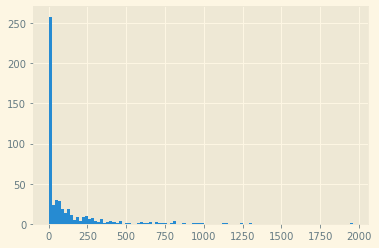

In [10]:
print(df['profitability_investment'].describe())
print(df['profitability_investment'].hist(bins=100));

Посмотрим на рекламные компании c рентабельность 0. Их получилось 155. Общая сумма вложений в эти рекламные компании компании: 4233837,82.

In [11]:
temp = (
    df.query('profitability_investment <= 0')
    .sort_values(by='budget', ascending=False)
)
print('Количество компаний с рентабельностью вложения равной 0 :', 
      temp['advertisement'].count())
print(temp['budget'].sum())

Количество компаний с рентабельностью вложения равной 0 : 155
4233837.82


Список 20 наиболее дорогостоящих рекламных мероприятий. Наименьший эффект от рекламы по ключевым словам в поиске и сетях.

In [12]:
temp.head(20)

,advertisement,budget,price_per_click,price_per_conv,price_per_transac,income_from_click,revenue,profitability_investment
106,yd_nnov_wardrobe_generic_search_v5,72911.24,77.32,867.99,0.0,0.0,0.0,0.0
124,yd_vor_couches_kreslo_all-types_search,63830.31,38.48,569.91,0.0,0.0,0.0,0.0
126,yd_nnov_dsa_pg_search,63317.68,64.87,867.37,0.0,0.0,0.0,0.0
135,yd_tvr_mebel_all-types_network,59603.59,42.60,532.17,0.0,0.0,0.0,0.0
137,yd_kazan_mebel_all-types_network_ctr,58932.64,18.50,818.51,0.0,0.0,0.0,0.0
147,yd_perm_couches_all-types_general_network_b,54741.40,52.69,977.53,0.0,0.0,0.0,0.0
148,yd_ryz_mebel_all-types_network,54642.10,42.46,748.52,0.0,0.0,0.0,0.0
160,yd_nsk_dsa_pg_search,51510.15,57.11,542.21,0.0,0.0,0.0,0.0
166,yd_ros_korpus_mebel_search,50449.76,86.39,1051.04,0.0,0.0,0.0,0.0
168,yd_spb_couches_all-types_network_v4_ctr,49677.59,53.59,558.18,0.0,0.0,0.0,0.0


Список 20 рекламных компаний с высокой рентабельностью инвестиций. Наибольший результат дает реклама по поиску бренда в крупных городах. 

In [13]:
df.sort_values(by='profitability_investment', ascending=False).head(20)

,advertisement,budget,price_per_click,price_per_conv,price_per_transac,income_from_click,revenue,profitability_investment
123,yd_vld_brand_search-v2,64653.46,39.57,105.47,1657.78,775.48,1265377.0,1959.89
494,yd_sta_brand_search-v2,12276.71,39.86,78.70,4092.24,517.10,156960.0,1297.30
171,yd_vor_brand_search-v2,49105.51,42.74,93.53,3507.54,528.25,601942.0,1236.04
273,yd_vlg_brand_search-v2,35762.57,40.82,85.97,2554.47,465.13,402606.0,1139.33
212,yd_perm_brand_search-v2,43868.43,43.78,83.88,2924.56,497.23,497531.0,1135.73
375,yd_countries_couches_generic_search_v5,22953.88,35.70,244.19,7651.29,352.63,223470.0,987.81
444,yd_tul_mebel_all-types_search,15885.44,53.31,836.08,7942.72,515.05,152380.0,966.21
194,yd_yar_brand_search-v2,46335.87,43.63,112.47,4633.59,417.61,437629.0,957.16
72,yd_ekb_brand_search-v2,100511.50,43.01,92.38,3045.80,404.19,937413.0,939.78
98,yd_nnov_brand_search-v2,75876.24,42.44,98.54,3298.97,369.24,657818.0,870.11


Добавим столбец отношение дохода от маркетинговой компании к её бюджету.

count    500.000000
mean       1.086620
std        2.159403
min        0.000000
25%        0.000000
50%        0.000000
75%        1.207970
max       19.571683
Name: conv, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


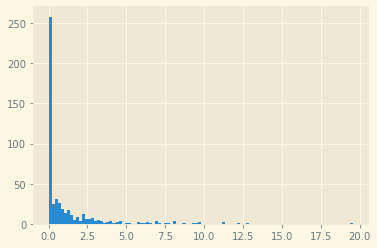

In [14]:
df['conv'] = df['revenue'] / df['budget']
print(df['conv'].describe())
print(df['conv'].hist(bins=100));

 Мы получаем 253  компаний не окупивших свой бюджет. Это 50,6% от всего количества. Сумма вложений: 8209048,51. В данный список попали выдача в поиске и сети по названию общей категории товара.

In [15]:
temp = df[df['conv']==0]
print('Количество :', temp['budget'].count())
print('Сумма вложений', temp['budget'].sum())

Количество : 253
Сумма вложений 8209048.51


Список недоходных компаний.

In [16]:
temp_list = temp['advertisement'].tolist()
temp_list

['yd_msk_couches_corner_selling-words_search-v2',
 'yd_chel_mebel_all-types_search',
 'yd_spb_bed_generic_search_v5',
 'yd_msk_bed_size_network_v5',
 'yd_msk_bedroom_bed_general-words_akcii_network-v2',
 'yd_nsk_couches_kreslo_all-types_network',
 'yd_nsk_mebel_all-types_network',
 'yd_spb_couches_all-types_network_v4_exp',
 'yd_tvr_couches_kreslo_all-types_search',
 'yd_kra_mebel_all-types_network',
 'yd_spb_couches_design_search_v5',
 'yd_kra_couches_interes_network_cpa_glavnaya',
 'yd_msk_couches_general-akcii_network-v2_cpa',
 'yd_nnov_wardrobe_generic_search_v5',
 'yd_msk_couches_interes_network_cpa',
 'yd_vor_couches_kreslo_all-types_search',
 'yd_nnov_dsa_pg_search',
 'yd_tvr_mebel_all-types_network',
 'yd_kazan_mebel_all-types_network_ctr',
 'yd_ros_mebel_all-types_network',
 'yd_msk_couches_divan-i-kresla_network-v2_cpa',
 'yd_kra_wardrobe_generic_search_v5',
 'yd_orel_smart_banner_retargeting_new',
 'yd_perm_couches_all-types_general_network_b',
 'yd_ryz_mebel_all-types_netwo

108 (21,6% от общего числа) компаний не полностью окупили свой бюджет. В них вложено 12245178,97. В данную группц вошли поиск, сети и смарт-банер в крупных и не очень городах. 

In [17]:
temp = df.query('0 < conv < 1')
print('Количество :', temp['budget'].count())
print('Сумма вложений', temp['budget'].sum())

Количество : 108
Сумма вложений 12245178.97


30 компаний наиболее близких к тому, чтобы окупить затраченый бюджет.

In [18]:
temp.sort_values(by='conv', ascending=False).head(30)

,advertisement,budget,price_per_click,price_per_conv,price_per_transac,income_from_click,revenue,profitability_investment,conv
306,yd_ekb_brand_network-v2_ctr,30449.46,67.67,349.99,15224.73,67.29,30280.0,99.44,0.994435
49,yd_yar_smart_banner_retargeting_new_lal_roi,128288.40,50.39,493.42,25657.68,51.13,126622.0,101.47,0.987011
31,yd_msk_korpus_mebel_search,211693.32,51.72,516.33,17641.11,51.24,207562.0,99.08,0.980484
128,yd_msk_couches_straight_selling-words_network-...,63105.14,65.12,525.88,31552.57,62.93,60980.0,96.63,0.966324
80,yd_ekb_mebel_all-types_network_ctr,90676.35,52.26,382.60,30225.45,50.20,87092.0,96.05,0.960471
364,yd_spb_couches_modeli_network-v2_cpa,23805.76,46.50,553.62,23805.76,43.50,22270.0,93.55,0.935488
116,yd_perm_mebel_all-types_network,67459.10,53.80,315.23,22486.37,49.87,62470.0,92.70,0.926043
27,yd_msk_competitors_big_network,264802.47,60.83,331.42,37828.92,58.06,244910.0,95.44,0.924878
286,yd_nnov_dsa_search,33681.19,62.49,783.28,33681.19,57.48,30980.0,91.98,0.919801
45,yd_msk_couches_krovat_general-words_search-v2,132328.71,76.45,906.36,33082.18,71.71,121640.0,93.80,0.919226


Список компаний частично окупивших свою бюджет.

In [19]:
temp_list = temp['advertisement'].tolist()
temp_list

['yd_msk_couches_generic_search_v5',
 'yd_msk_bed_size_search_v5',
 'yd_msk_bed_generic_search_v5',
 'yd_spb_couches_type_search_v5',
 'yd_msk_couches_type_search_v5_new',
 'yd_msk_couches_specific_search_v5',
 'yd_spb_couches_specific_search_v5',
 'yd_msk_smart_banner_retargeting_new',
 'yd_ekb_couches_kreslo_all-types_search',
 'yd_spb_couches_general-words_search-v2',
 'yd_nnov_couches_kreslo_all-types_search',
 'yd_msk_competitors_big_network',
 'yd_spb_mebel_likvid_network_cpa_ctr',
 'yd_msk_korpus_mebel_search',
 'yd_msk_couches_type_search_v5_old',
 'yd_msk_couches_corner_general-words_search-v2',
 'yd_kazan_couches_kreslo_all-types_search',
 'yd_msk_couches_general-words_search-v2',
 'yd_spb_competitors_big_network',
 'yd_msk_couches_krovat_general-words_search-v2',
 'yd_spb_korpus_mebel_search',
 'yd_nsk_smart_banner_retargeting_new_lal',
 'yd_ryz_smart_banner_retargeting_new',
 'yd_yar_smart_banner_retargeting_new_lal_roi',
 'yd_nnov_smart_banner_retargeting_new_lal_roi',
 'y

Количество рекламных компаний принесших прибыль 139. В основном это поиск по бренду, ключевым словам "магазин мебели", сети, смарт-банеры, в крупных городах.

In [20]:
temp = df.query('conv > 1')
print('Количество :', temp['budget'].count())
print('Сумма вложений', temp['budget'].sum())

Количество : 139
Сумма вложений 21079990.07


30 наиболее прибыльных компаний.

In [21]:
temp.sort_values(by='conv', ascending=False).head(30)

,advertisement,budget,price_per_click,price_per_conv,price_per_transac,income_from_click,revenue,profitability_investment,conv
123,yd_vld_brand_search-v2,64653.46,39.57,105.47,1657.78,775.48,1265377.0,1959.89,19.571683
494,yd_sta_brand_search-v2,12276.71,39.86,78.70,4092.24,517.10,156960.0,1297.30,12.785184
171,yd_vor_brand_search-v2,49105.51,42.74,93.53,3507.54,528.25,601942.0,1236.04,12.258136
212,yd_perm_brand_search-v2,43868.43,43.78,83.88,2924.56,497.23,497531.0,1135.73,11.341436
273,yd_vlg_brand_search-v2,35762.57,40.82,85.97,2554.47,465.13,402606.0,1139.33,11.257748
375,yd_countries_couches_generic_search_v5,22953.88,35.70,244.19,7651.29,352.63,223470.0,987.81,9.735609
444,yd_tul_mebel_all-types_search,15885.44,53.31,836.08,7942.72,515.05,152380.0,966.21,9.592432
194,yd_yar_brand_search-v2,46335.87,43.63,112.47,4633.59,417.61,437629.0,957.16,9.444713
72,yd_ekb_brand_search-v2,100511.50,43.01,92.38,3045.80,404.19,937413.0,939.78,9.326425
98,yd_nnov_brand_search-v2,75876.24,42.44,98.54,3298.97,369.24,657818.0,870.11,8.669618


Список компаний принесших прибыль.

In [22]:
temp_list = temp['advertisement'].tolist()
temp_list

['yd_msk_brand_search-v2',
 'yd_msk_dsa_pg_search',
 'yd_msk_magazin-mebeli_asmaster',
 'yd_spb_smart_banner_retargeting_new_lal_roi',
 'yd_spb_brand_search-v2',
 'yd_msk_couches_general-selling-words_search-v2',
 'yd_msk_br_couches_magazin_search-v2',
 'yd_msk_mebel_likvid_network_cpa',
 'yd_msk_smart_banner_retargeting_new_lal_roi',
 'yd_msk_smart_banner_retargeting_new_dop-cat_cpa',
 'yd_spb_dsa_pg_search',
 'yd_spb_couches_generic_search_v5',
 'yd_msk_magazin-mebeli_mastercampaign',
 'yd_msk_divan_search',
 'yd_msk_categor_retargeting_new-segment_old',
 'yd_msk_wardrobe_generic_search_v5',
 'yd_ekb_smart_banner_retargeting_new_lal_roi',
 'yd_kra_smart_banner_retargeting_new_lal_roi',
 'yd_spb_dsa_search',
 'yd_msk_couches_divan-broad_search_strat',
 'yd_nsk_couches_kreslo_all-types_search',
 'yd_vld_smart_banner_retargeting_new_lal_roi',
 'yd_msk_couches_avtotarg_network_сpa',
 'yd_kra_couches_kreslo_all-types_search',
 'yd_msk_competitors_big_search_v2',
 'yd_msk_dsa_new_search_cp

## Выводы:
72% рекламных компаний имеют рентабельность менее 100%. 253 (50,6%) рекламные компании не принесли доход вовсе, на них потрачено 8209048,51. 108 (21,6%) компаний окупили свой бюджет лишь частично. В них вложено 12245178,97. Количество рекламных компаний принесших прибыль 139. При анализе успешных рекламных компаний удалось выявить следующие удачные сочетания: поиск по бреду в городах любого размера, выдача в поиске и через сети в крупных городах страны (Мск, Спб, Екб, Крас и тд), выдача в поиске по запросу "мебельный магазин". С поиском и сетями по конкретным предметам мебели стоит быть аккуратными. При размещении в крупных городах страны может принести положительный результат, при использовании в небольших регионах возможен отрицательный эффект. 

Для увеличения дохода бюджет, задействованный в компаниях не принесших ничего, можно перераспределить на более успешные рекламные сочетания.